<h2 align=center> Toxic Comments Classification using 1D CNN with Keras</h2>

### Task 1: Import Packages and Functions

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
print(tf.__version__)

2.2.0


### Task 2: Load and Explore Data

In [ ]:
# Load data
train=pd.read_csv('/path to folder/train.csv')
test=pd.read_csv('/path to folder/test.csv')
train.head()

,comment_text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [ ]:
x= train['comment_text'].values

### Task 3- View few toxic comments


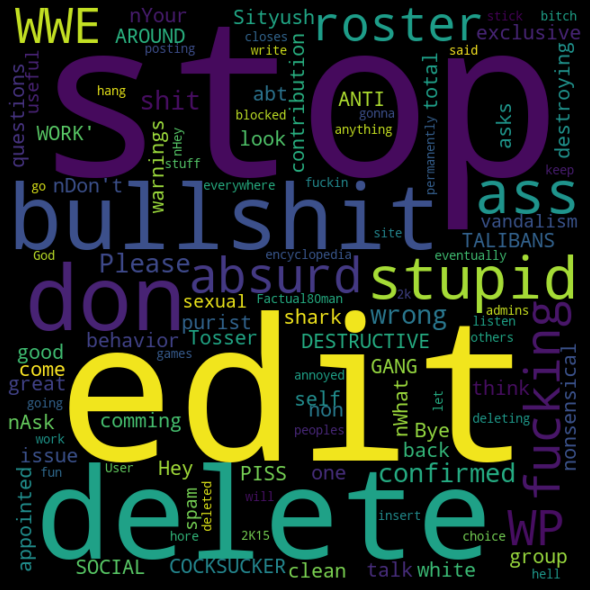

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
comments = train['comment_text'].loc[train['toxic']==1].values
wordcloud = WordCloud(
    width = 640,
    height = 640,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(comments))
fig = plt.figure(
    figsize = (12, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
y=train['toxic'].values

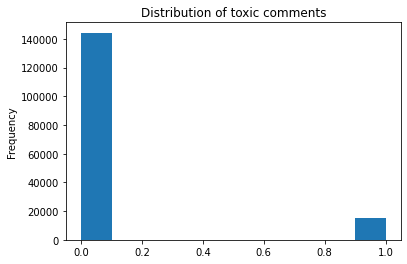

In [ ]:
# Plot frequency of toxic comments
train['toxic'].plot(kind='hist', title='Distribution of toxic comments')



### Task 4: Data Prep — Tokenize and Pad Text Data

In [ ]:
max_features=20000
max_text_len=400
embedding_dim = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
filters=128
kernel_size=5
hidden_dims=24


In [ ]:
tokenizer=text.Tokenizer(max_features, oov_token=oov_tok)
tokenizer.fit_on_texts(list(x))
word_index = tokenizer.word_index
tokenized=tokenizer.texts_to_sequences(x)
X_train=sequence.pad_sequences(tokenized,maxlen=max_text_len, padding=padding_type, truncating=trunc_type)

### Task 5: Create the Embedding Layer

In [ ]:
model=Sequential()
model.add(Embedding(max_features,embedding_dim,input_length=max_text_len))
model.add(Dropout(0.2))
model.add(Conv1D(filters,kernel_size,padding='valid',activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(filters,5,padding='valid',activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 400, 100)          2000000   
_________________________________________________________________
dropout_8 (Dropout)          (None, 400, 100)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 396, 128)          64128     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 198, 128)          0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 194, 128)          82048     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 24)               

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### Task 7: Train Model

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y,test_size=0.15,random_state=1)

In [ ]:
batch_size=64
early=EarlyStopping(monitor='val_accuracy',patience=3,mode='max')
hist=model.fit(X_train,y_train,batch_size=batch_size,epochs=20,validation_data=(X_val,y_val),callbacks=[early])

Epoch 1/20
2120/2120 [==============================] - 63s 30ms/step - loss: 0.1399 - accuracy: 0.9498 - val_loss: 0.1112 - val_accuracy: 0.9598
Epoch 2/20
2120/2120 [==============================] - 62s 29ms/step - loss: 0.0876 - accuracy: 0.9672 - val_loss: 0.1037 - val_accuracy: 0.9624
Epoch 3/20
2120/2120 [==============================] - 62s 29ms/step - loss: 0.0632 - accuracy: 0.9760 - val_loss: 0.1334 - val_accuracy: 0.9614
Epoch 4/20
2120/2120 [==============================] - 62s 29ms/step - loss: 0.0420 - accuracy: 0.9844 - val_loss: 0.1888 - val_accuracy: 0.9586
Epoch 5/20
2120/2120 [==============================] - 60s 28ms/step - loss: 0.0285 - accuracy: 0.9904 - val_loss: 0.1983 - val_accuracy: 0.9533


In [ ]:
model.save('toxic_classification.h5')

### Task-8 Plot accuracy vs epoch and loss vs epoch

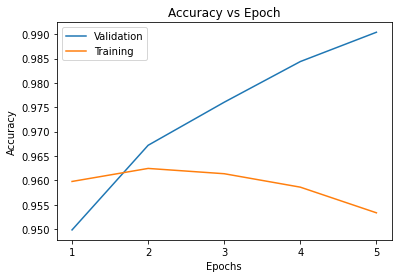

In [ ]:
epochs = range(len(hist.history['accuracy']))
plt.plot(epochs,hist.history['accuracy'],label='Validation')
plt.plot(epochs,hist.history['val_accuracy'],label='Training')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.xticks(range(len(hist.history['accuracy'])),labels=[1,2,3,4,5])
plt.title('Accuracy vs Epoch')
plt.legend()
plt.show()

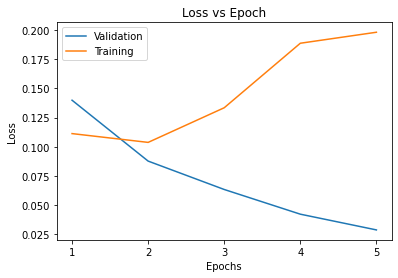

In [ ]:
epochs = range(len(hist.history['accuracy']))
plt.plot(epochs,hist.history['loss'],label='Validation')
plt.plot(epochs,hist.history['val_loss'],label='Training')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.xticks(range(len(hist.history['accuracy'])),labels=[1,2,3,4,5])
plt.title('Loss vs Epoch')
plt.legend()
plt.show()

### Task 9: Evaluate Model

In [ ]:
model.evaluate(X_val,y_val)

748/748 [==============================] - 3s 4ms/step - loss: 0.1983 - accuracy: 0.9533


[0.1982690542936325, 0.9533339142799377]

### Task 10- Make predictions

In [ ]:
x_test=test['comment_text'].values


In [ ]:
tokenized=tokenizer.texts_to_sequences(x_test)
X_test=sequence.pad_sequences(tokenized,maxlen=max_text_len, padding=padding_type, truncating=trunc_type)

In [ ]:
y_test=model.predict(X_test,verbose=1,batch_size=128)

1197/1197 [==============================] - 10s 8ms/step


In [ ]:
test['toxic']=['not toxic' if x < .5 else 'toxic' for x in y_test]
test.head(20)

,comment_text,toxic
0,Yo bitch Ja Rule is more succesful then you'll...,toxic
1,== From RfC == \n\n The title is fine as it is...,not toxic
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",not toxic
3,":If you have a look back at the source, the in...",not toxic
4,I don't anonymously edit articles at all.,not toxic
5,Thank you for understanding. I think very high...,not toxic
6,Please do not add nonsense to Wikipedia. Such ...,not toxic
7,:Dear god this site is horrible.,toxic
8,""" \n Only a fool can believe in such numbers. ...",not toxic
9,== Double Redirects == \n\n When fixing double...,not toxic


### Display toxic as well as non-toxic comments

In [ ]:
list(test.loc[7])

[':Dear god this site is horrible.', 'toxic']

In [ ]:
list(test.loc[5])

['Thank you for understanding. I think very highly of you and would not revert without discussion.',
 'not toxic']